#### Sumeet Shivgand
#### R00182850
#### Assignment 3

In [1]:
import numpy as np
import pandas as pd 
import glob,cv2,os
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [23]:
label=[]
data=[]
counter=0
image_size = (64,64)

# Read the train directory from local system
path="D:\\CIT\\Semester 2\\Applied Machine Learning\\Assignment 3\\Project3_files\\Project3_files\\data\\train"
for file in os.listdir(path):
    # read the image using openCv
    image_data=cv2.imread(os.path.join(path,file))
    # resizing the images into equal sizes
    image_data=cv2.resize(image_data,image_size).flatten()
    if file.startswith("cat"):
        label.append(0)
    elif file.startswith("dog"):
        label.append(1)
    try:
        data.append(image_data/255)
    except:
        label=label[:len(label)-1]
    counter+=1
    if counter%100==0:
        print (counter," image data retreived")

# Converted the data into array
data=np.array(data)
label=np.array(label)
print (data.shape)
print (label.shape)

100  image data retreived
200  image data retreived
300  image data retreived
400  image data retreived
500  image data retreived
600  image data retreived
700  image data retreived
800  image data retreived
900  image data retreived
1000  image data retreived
(1002, 12288)
(1002,)


1    501
0    501
dtype: int64

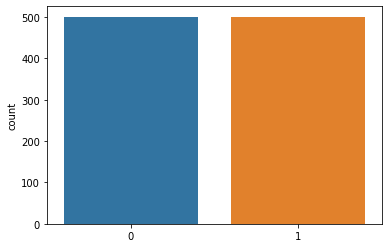

In [24]:
sns.countplot(label)
pd.Series(label).value_counts()

In [25]:
from sklearn.model_selection import train_test_split
train_data, valid_data, train_label, valid_label = train_test_split(data, label, test_size=0.25, random_state=42)
#print(train_data)
#print(train_label)
#print(valid_data)
#print(valid_label)
#print(np.count_nonzero(train_label == 1))
#print(np.count_nonzero(train_label == 0))
#print(np.count_nonzero(valid_label == 1))
#print(np.count_nonzero(valid_label == 0))

0    378
1    373
dtype: int64

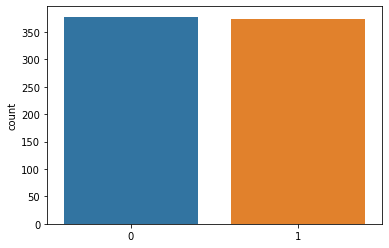

In [26]:
sns.countplot(train_label)
pd.Series(train_label).value_counts()

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_data, train_label)
pred = knn.predict(valid_data)

# Accuracy of the model
print('Accuracy Score: \n', accuracy_score(valid_label, pred))

# Evaluation Metrics: Classification report
print(classification_report(valid_label, pred))

# Evaluation Metrics: Confusion Marix
confusion_test = confusion_matrix(valid_label, pred)
pd.DataFrame(data = confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


Accuracy Score: 
 0.545816733067729
              precision    recall  f1-score   support

           0       0.52      0.85      0.65       123
           1       0.64      0.25      0.36       128

    accuracy                           0.55       251
   macro avg       0.58      0.55      0.50       251
weighted avg       0.58      0.55      0.50       251



,Predicted 0,Predicted 1
Actual 0,105,18
Actual 1,96,32


In [28]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_data,train_label)
pred1 = svm.predict(valid_data)

# Accuracy of the model
print('Accuracy Score: \n', accuracy_score(valid_label, pred1))

# Evaluation Metrics: Classification report
print(classification_report(valid_label, pred1))

# Evaluation Metrics: Confusion Marix
confusion_test1 = confusion_matrix(valid_label, pred1)
pd.DataFrame(data = confusion_test1, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


Accuracy Score: 
 0.6254980079681275
              precision    recall  f1-score   support

           0       0.63      0.59      0.61       123
           1       0.62      0.66      0.64       128

    accuracy                           0.63       251
   macro avg       0.63      0.62      0.62       251
weighted avg       0.63      0.63      0.62       251



,Predicted 0,Predicted 1
Actual 0,72,51
Actual 1,43,85


In [29]:
from sklearn.tree import DecisionTreeClassifier
#dt = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
dt = DecisionTreeClassifier()
dt.fit(train_data,train_label)
pred2 = dt.predict(valid_data)

# Accuracy of the model
print('Accuracy Score: \n', accuracy_score(valid_label, pred2))

# Evaluation Metrics: Classification report
print(classification_report(valid_label, pred2))

# Evaluation Metrics: Confusion Marix
confusion_test2 = confusion_matrix(valid_label, pred2)
pd.DataFrame(data = confusion_test2, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


Accuracy Score: 
 0.5258964143426295
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       123
           1       0.54      0.48      0.51       128

    accuracy                           0.53       251
   macro avg       0.53      0.53      0.53       251
weighted avg       0.53      0.53      0.52       251



,Predicted 0,Predicted 1
Actual 0,71,52
Actual 1,67,61


In [30]:
from sklearn.model_selection import GridSearchCV 
  
# defining parameter range for SVM
param_grid = {'gamma': [ 1.0, 0.1,0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True) 
  
# fitting the model for grid search 
grid.fit(train_data, train_label) 

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'gamma': [1.0, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix 
grid_predictions = grid.predict(valid_data) 

# Accuracy of the model
print('Accuracy Score: \n', accuracy_score(valid_label, grid_predictions))

# Evaluation Metrics: Classification report
print(classification_report(valid_label, grid_predictions))

# Evaluation Metrics: Confusion Marix
confusion_test1 = confusion_matrix(valid_label, grid_predictions)
pd.DataFrame(data = confusion_test1, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])


Accuracy Score: 
 0.6135458167330677
              precision    recall  f1-score   support

           0       0.62      0.56      0.59       123
           1       0.61      0.66      0.64       128

    accuracy                           0.61       251
   macro avg       0.61      0.61      0.61       251
weighted avg       0.61      0.61      0.61       251



,Predicted 0,Predicted 1
Actual 0,69,54
Actual 1,43,85


In [35]:
## Test data
test_data=[]
id=[]
counter=0

# Read the test directory from local system
path="D:\\CIT\\Semester 2\\Applied Machine Learning\\Assignment 3\\Project3_files\\Project3_files\\data\\test"
for file in os.listdir(path):
     # read the image using openCv
    image_data=cv2.imread(os.path.join(path,file))
    # resizing the images into equal sizes
    image_data=cv2.resize(image_data,(64,64)).flatten()
    try:
        test_data.append(image_data/255)
        id.append((file.split("."))[0])
    except:
        print ("One eliminated")
    counter+=1
    if counter%20==0:
        print(counter," image data retreived")
test_data1=np.array(test_data)
print (test_data1.shape)

20  image data retreived
40  image data retreived
60  image data retreived
80  image data retreived
100  image data retreived
(100, 12288)


In [39]:
# Prediction on test data
grid_pred_test = grid.predict(test_data1) 
print(grid_pred_test)

[0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0
 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0]
